In [1]:
import scipy
from numpy.random import normal
import numpy as np
import matplotlib.pyplot as plt
from scipy.stats import chisquare
import matplotlib
plt.rcParams['mathtext.fontset'] = 'stix'
plt.rcParams['font.family'] = 'STIXGeneral'
plt.rc('font', size=12) 
%config InlineBackend.figure_format = 'svg'

In [31]:
np.random.seed(123)
noise = np.random.normal(0,10,20)

fun = []
err = []
for i in np.linspace(0,4*3.14,20):
    fun.append(i**2)
    err.append(10)
fun = np.array(fun)
err = np.array(err)
x = np.array(range(0,20))

data = noise+fun

/opt/homebrew/lib/python3.9/site-packages/IPython/core/interactiveshell.py:3251: RankWarning: Polyfit may be poorly conditioned
  exec(code_obj, self.user_global_ns, self.user_ns)


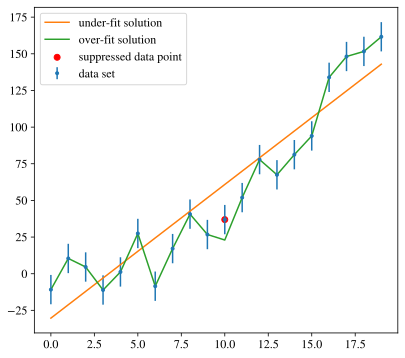

In [33]:
del_i= 10


m0 = np.polyfit(np.delete(x,del_i),np.delete(data,del_i),1)
m1 = np.polyfit(np.delete(x,del_i),np.delete(data,del_i),20)

fig = plt.figure(figsize=(6.52437527778,6))
gs = plt.GridSpec(nrows=1, ncols=1,hspace=.5,wspace=.3)
ax = fig.add_subplot(gs[0,0])

ax.errorbar(x,data,yerr=err,marker='.',label='data set',ls='none')
ax.plot(x,np.polyval(m0,x), label='under-fit solution')
ax.plot(x,np.polyval(m1,x), label='over-fit solution')

ax.scatter(x[del_i],data[del_i],color='red',label='suppressed data point')
ax.legend()
plt.savefig('cross_validation_motivation.pdf')